### The University of Melbourne, School of Computing and Information Systems
# COMP90086 Computer Vision, 2022 Semester 2

## Assignment 3

**Student Name:**    Benjamin Cheng-Hsien Yi

**Student ID:**     1152795

This iPython notebook is a template which you should use for your Assignment 3 submission. This file should be submitted at the **Assignment 3: Code** link on the LMS, along with any images needed to run your code.

In addition to this file, you should submit a writren report explaining your results at the **Assignment 3: Report** link on the LMS. Please see the assignment specification for details on what must be included in the report for each question.

*Adding proper comments to your code is MANDATORY.*

### 1. Load images and compute correspondences


In [34]:
import numpy as np
import cv2
import random
import math
import os
from matplotlib import pyplot as plt

In [35]:
# Code from workshop 8
def readImage(fileA, fileB):
    # Read in images from a filepath as graycsale.
    imgA = cv2.imread(fileA, cv2.IMREAD_GRAYSCALE)
    imgB = cv2.imread(fileB, cv2.IMREAD_GRAYSCALE)
    return imgA, imgB

# Code from workshop 7 and 8
def findPoints(imgA, imgB):
    # Initiate SIFT detector
    sift = cv2.SIFT_create()

    # Compute SIFT keypoints and descriptors
    kp1, des1 = sift.detectAndCompute(imgA, None)
    kp2, des2 = sift.detectAndCompute(imgB, None)

    # FLANN parameters and initialize
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # Matching descriptor using KNN algorithm
    matches = flann.knnMatch(des1, des2, k=2)

    # Apply ratio test
    good = []

    for i,(m,n) in enumerate(matches):
        if m.distance < 0.8 * n.distance:
            good.append(m)

    # Estimate homography between two images
    ptsA = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
    ptsB = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1,1,2)

    H, status = cv2.findHomography( ptsA, 
                                    ptsB, 
                                    cv2.RANSAC, 
                                    ransacReprojThreshold = 5, 
                                    maxIters = 500)

    matchesMask = status.ravel().tolist()

    # Draw our inliers
    draw_params = dict(matchColor = (0,255,0), # draw in a specific colour
                    singlePointColor = (255,0,0), # draw in a specific colour
                    matchesMask = matchesMask, # draw only inliers
                    flags = 2)

    success_matches = cv2.drawMatches(imgA,kp1,imgB,kp2,good,None,**draw_params)

    prop = float(np.count_nonzero(matchesMask))/len(matchesMask)
    k = np.log(1 - 0.99)/np.log(1 - math.pow(prop, 8))

    print("Number of points: " + str(len(matchesMask)))
    print("Number of inliers: " + str(np.count_nonzero(matchesMask)))
    print("Number of iterations needed: " + str(k))

    # Plotting results
    plt.imshow(success_matches)
    plt.title('All matches')
    plt.axis('off')

    plt.show()

    return ptsA, ptsB

Found 16 images: [('kusvod2\\bookshA.png', 'kusvod2\\bookshB.png'), ('kusvod2\\boxA.png', 'kusvod2\\boxB.png'), ('kusvod2\\castleA.png', 'kusvod2\\castleB.png'), ('kusvod2\\corrA.png', 'kusvod2\\corrB.png'), ('kusvod2\\graffA.png', 'kusvod2\\graffB.png'), ('kusvod2\\headA.jpg', 'kusvod2\\headB.jpg'), ('kusvod2\\kampaA.png', 'kusvod2\\kampaB.png'), ('kusvod2\\KyotoA.jpg', 'kusvod2\\KyotoB.jpg'), ('kusvod2\\leafsA.jpg', 'kusvod2\\leafsB.jpg'), ('kusvod2\\plantA.png', 'kusvod2\\plantB.png'), ('kusvod2\\rotundaA.png', 'kusvod2\\rotundaB.png'), ('kusvod2\\shoutA.png', 'kusvod2\\shoutB.png'), ('kusvod2\\valbonneA.png', 'kusvod2\\valbonneB.png'), ('kusvod2\\wallA.jpg', 'kusvod2\\wallB.jpg'), ('kusvod2\\washA.png', 'kusvod2\\washB.png'), ('kusvod2\\zoomA.png', 'kusvod2\\zoomB.png')]
Number of points: 216
Number of inliers: 77
Number of iterations needed: 17656.038029032006


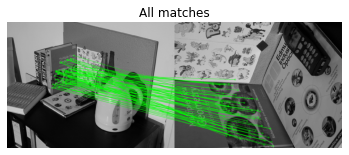

Number of points: 373
Number of inliers: 219
Number of iterations needed: 323.8014340883866


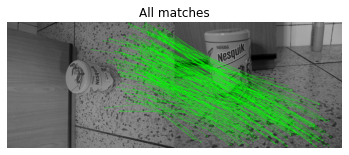

Number of points: 403
Number of inliers: 184
Number of iterations needed: 2436.3129730292826


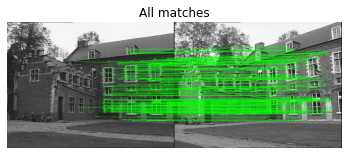

Number of points: 438
Number of inliers: 356
Number of iterations needed: 21.79540318228831


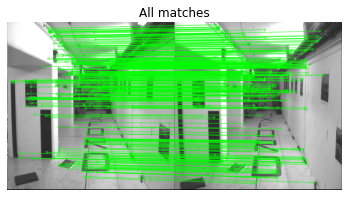

Number of points: 205
Number of inliers: 9
Number of iterations needed: 333684762580.8567


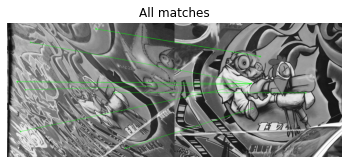

Number of points: 401
Number of inliers: 98
Number of iterations needed: 361900.594557178


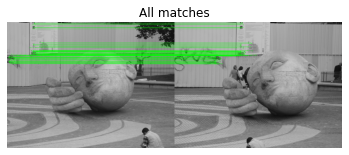

Number of points: 284
Number of inliers: 124
Number of iterations needed: 3484.431764850277


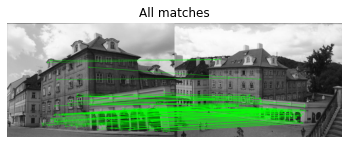

Number of points: 2753
Number of inliers: 276
Number of iterations needed: 451255715.1027037


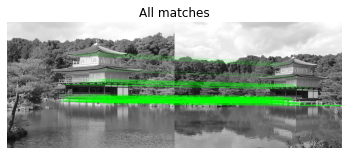

Number of points: 363
Number of inliers: 20
Number of iterations needed: 54232373972.742714


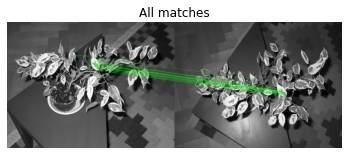

Number of points: 358
Number of inliers: 41
Number of iterations needed: 155610550.0725739


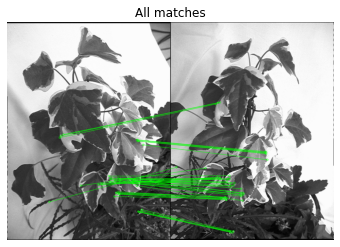

Number of points: 83
Number of inliers: 18
Number of iterations needed: 941216.0408027765


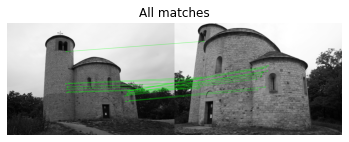

Number of points: 238
Number of inliers: 96
Number of iterations needed: 6569.605166666073


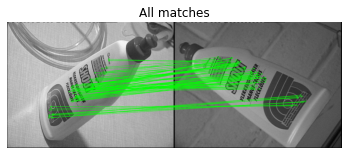

Number of points: 199
Number of inliers: 111
Number of iterations needed: 489.151865748492


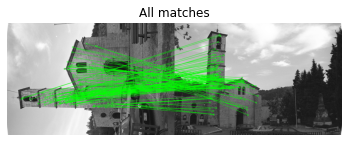

Number of points: 460
Number of inliers: 52
Number of iterations needed: 172695723.25422865


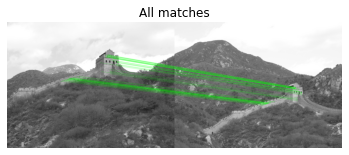

Number of points: 157
Number of inliers: 30
Number of iterations needed: 2591030.2295662775


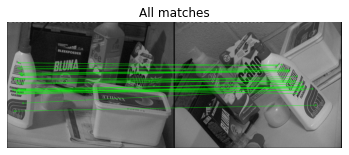

Number of points: 270
Number of inliers: 93
Number of iterations needed: 23240.698783515887


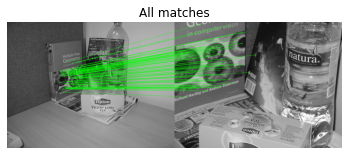

In [36]:
dir = "kusvod2"

imgs = []
fn2 = ""
for file in os.scandir(dir):
    fn = file.path
    if fn.endswith("A.png"):
        fn2 = fn[:-5] + "B.png"
        imgs.append((fn, fn2))
    if fn.endswith("A.jpg"):
        fn2 = fn[:-5] + "B.jpg"
        imgs.append((fn, fn2))

n_images = len(imgs)
print("Found " + str(n_images) + " images: " + str(imgs))

img_AB = []
pts_AB = []

for i in range(n_images):
    imgA, imgB = readImage(imgs[i][0], imgs[i][1])
    ptsA, ptsB = findPoints(imgA, imgB)

    img_AB.append((imgA, imgB))
    pts_AB.append((ptsA, ptsB))

### 2. Compute the Fundamental Matrix F using the 8 point algorithm

In [37]:
def shift_scale(pts):
    x_centroid = sum([x[0] for x in pts])/len(pts)
    y_centroid = sum([x[1] for x in pts])/len(pts)

    pts_shifted = \
        [[x[0] - x_centroid, x[1] - y_centroid] for x in pts]

    denom = (1.0/len(pts_shifted)) * sum([x[0]**2 + x[1]**2 for x in pts_shifted]) + 1e-3
    scale_factor = np.sqrt(2) / np.sqrt(denom)

    T_1 = [[scale_factor, 0,              0],
           [0,            scale_factor,   0],
           [0,            0,              1]]

    T_2 = [[1, 0, -x_centroid],
           [0, 1, -y_centroid],
           [0, 0, 1          ]]

    T = np.array(T_1) @ np.array(T_2)

    pts_t = [np.append(x, 1) for x in pts]
    pts_shifted_scaled = \
        [T @ x for x in pts_t]

    return pts_shifted_scaled, T

def unshift_scale(F, T1, T2):
    F_uns = T2.transpose() @ F @ T1
    return F_uns

def choose_random_8(ptsA, ptsB, n=8):
    idx = random.choices(range(len(ptsA)), k=n)
    ptsA_eight = [ptsA[x] for x in idx]
    ptsB_eight = [ptsB[x] for x in idx]
    return ptsA_eight, ptsB_eight

def eight_point_loop(ptsA, ptsB, eight=True):
    # Shift and scale pixel coordinates
    
    if (eight):
        ptsA_clean = [x[0] for x in ptsA]
        ptsB_clean = [x[0] for x in ptsB]
        ptsA_eight, ptsB_eight = choose_random_8(ptsA_clean, ptsB_clean)
    else:
        ptsA_clean, ptsB_clean = ptsA, ptsB
        ptsA_eight, ptsB_eight = ptsA_clean, ptsB_clean

    ptsA_ss, TA = shift_scale(ptsA_eight)
    ptsB_ss, TB = shift_scale(ptsB_eight)

    # Construct design matrix
    matrix = []
    for i in range(len(ptsA_ss)):
        p1 = ptsA_ss[i][0]
        p2 = ptsA_ss[i][1]
        q1 = ptsB_ss[i][0]
        q2 = ptsB_ss[i][1]
        row = [p1*q1, p2*q1, q1, p1*q2, p2*q2, q2, p1, p2, 1]
        matrix.append(row)

    # Perform SVD to find null space
    _, _, vh = np.linalg.svd(matrix)

    # Compose draft fundamental matrix
    F = [x[-1] for x in vh]
    F = np.reshape(F, (3, 3))

    # Perform SVD and reassemble
    try:
        u, s, vh = np.linalg.svd(F)
    except:
        return 0, [], [], [], []
    s[-1] = 0
    F = u @ np.diag(s) @ vh
    F_uns = unshift_scale(F, np.array(TA), np.array(TB))

    # Calculate epilines
    lines_A = []
    lines_B = []
    for i in range(len(ptsA)):
        row_B = F_uns @ np.array(np.append(ptsA_clean[i], [1])).reshape(3, 1)
        row_A = F_uns.transpose() @ np.array(np.append(ptsB_clean[i], [1])).reshape(3, 1)
        lines_A.append(row_A.reshape(3, 1).transpose()[0])
        lines_B.append(row_B.reshape(3, 1).transpose()[0])

    # Find inliers
    inliers = []
    for i in range(len(ptsA_clean)):
        row_A = np.append(ptsA_clean[i], 1)
        row_B = np.append(ptsB_clean[i], 1)
        error = np.abs(row_B.transpose() @ F_uns @ row_A)
        if (error < 0.001):
            inliers.append((ptsA_clean[i], ptsB_clean[i]))

    return len(inliers), inliers, lines_A, lines_B, F_uns

def calculateF(ptsA, ptsB, name):
    max_n = 0
    max_inliers = []
    max_lines_A = []
    max_lines_B = []
    max_F = []
    for i in range(5000):
        n, inliers, lines_A, lines_B, F_u = eight_point_loop(ptsA, ptsB)
        if n > max_n:
            max_n = n
            max_inliers = inliers
            max_lines_A = lines_A
            max_lines_B = lines_B
            max_F = F_u

    print("File: " + name)
    print("Number of inliers: " + str(max_n))

    max_A = [x[0] for x in max_inliers]
    max_B = [x[1] for x in max_inliers]
    
    if (max_n >= 8):
        max_n, _, max_lines_A, max_lines_B, max_F = eight_point_loop(max_A, max_B, False)

    print("Final number of inliers: " + str(max_n))

    return max_A, max_B, max_lines_A, max_lines_B, max_F

In [38]:
results = []

for i in range(n_images):
    ptsA = pts_AB[i][0]
    ptsB = pts_AB[i][1]

    max_A, max_B, lines_A, lines_B, max_F = calculateF(ptsA, ptsB, imgs[i][0][:-5])
    results.append((max_A, max_B, lines_A, lines_B))
    print(max_F)
    print("")

File: kusvod2\booksh
Number of inliers: 4
Final number of inliers: 4
[[ 3.18122473e-05  1.65408972e-05 -1.53879813e-02]
 [-1.06560993e-05  7.28355576e-05 -1.52030162e-02]
 [-6.44737597e-03 -2.68712631e-02  9.22750034e+00]]

File: kusvod2\box
Number of inliers: 5
Final number of inliers: 5
[[-6.06493425e-06  5.83956475e-06  6.12693404e-03]
 [-2.29338941e-05 -5.75477973e-06  2.20652721e-02]
 [ 1.65212479e-02 -6.21769938e-04 -1.60844227e+01]]

File: kusvod2\castle
Number of inliers: 7
Final number of inliers: 7
[[-3.68600087e-06  3.70816228e-05 -8.26498352e-03]
 [-2.79434010e-05  4.39003862e-06  1.56649320e-02]
 [ 9.76343218e-03 -2.31873903e-02  6.55275919e-01]]

File: kusvod2\corr
Number of inliers: 8
Final number of inliers: 0
[[-3.35958402e-04 -5.19424667e-04  1.35329806e-01]
 [-5.89156475e-05 -4.28479278e-05  1.85858764e-02]
 [ 1.07698841e-01  1.36063764e-01 -4.01346435e+01]]

File: kusvod2\graff
Number of inliers: 8
Final number of inliers: 1
[[ 1.36322013e-05  3.51913542e-05 -3.9797

### 3. Randomly sample 10 correspondences and display images, corresponding points and epipolar lines

In [39]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines, pts1, pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color, 5)
        img1 = cv2.circle(img1, tuple(pt1), 5, color, -1)
        img2 = cv2.circle(img2, tuple(pt2), 5, color, -1)
    return img1,img2

def displayImage(max_A, max_B, lines_A, lines_B, imgA, imgB, file):
    if (len(max_A) >= 10):
        ptsA_ten, ptsB_ten = choose_random_8(max_A, max_B, 10)
    else:
        ptsA_ten, ptsB_ten = max_A, max_B

    ptsA_int = [[int(x), int(y)] for [x, y] in ptsA_ten]
    ptsB_int = [[int(x), int(y)] for [x, y] in ptsB_ten]

    imgL, _ = drawlines(imgA, imgB, lines_A, ptsA_int, ptsB_int)
    imgR, _ = drawlines(imgB, imgA, lines_B, ptsB_int, ptsA_int)

    # Display the results
    plt.subplots(figsize=(15, 15)) 

    plt.subplot(1,2,1)
    plt.imshow(imgL, cmap='gray')  
    plt.title(file + ": left")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(imgR, cmap='gray')  
    plt.title(file + ": right")
    plt.axis('off')

    plt.show()

kusvod2\booksh


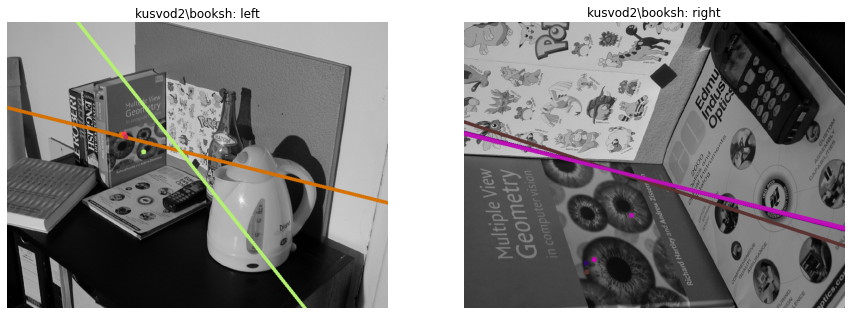

kusvod2\box


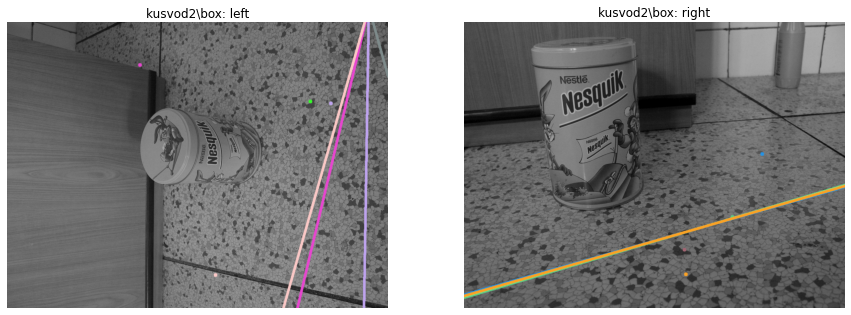

kusvod2\castle


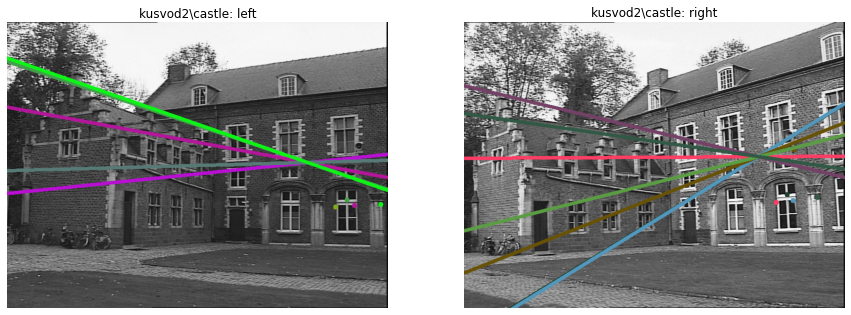

kusvod2\corr


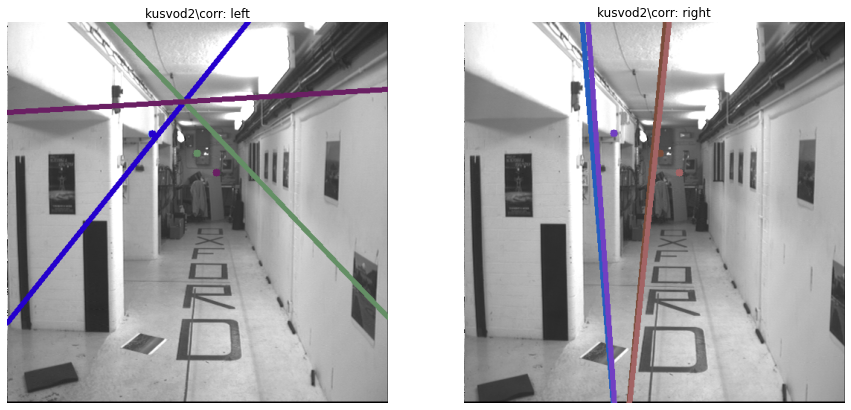

kusvod2\graff


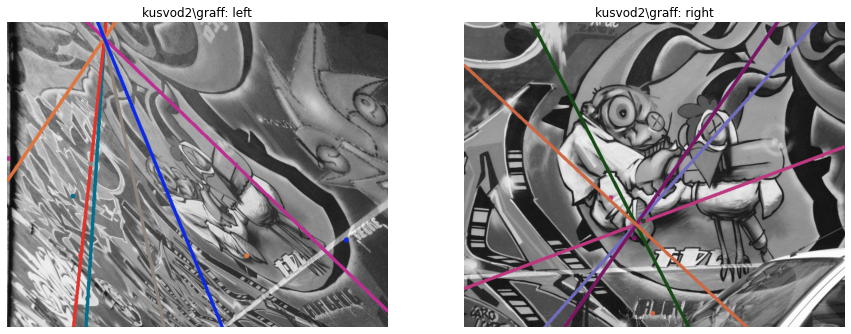

kusvod2\head


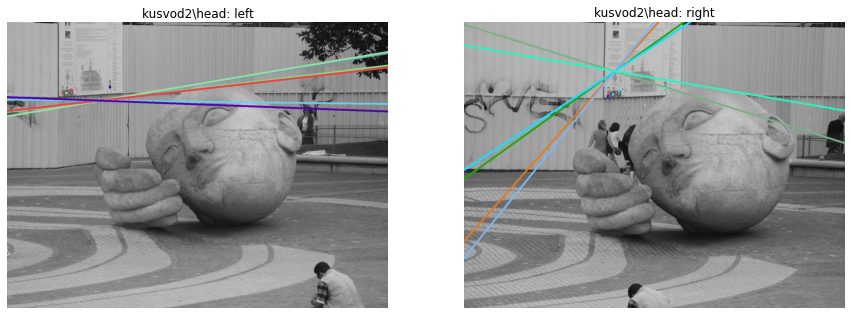

kusvod2\kampa


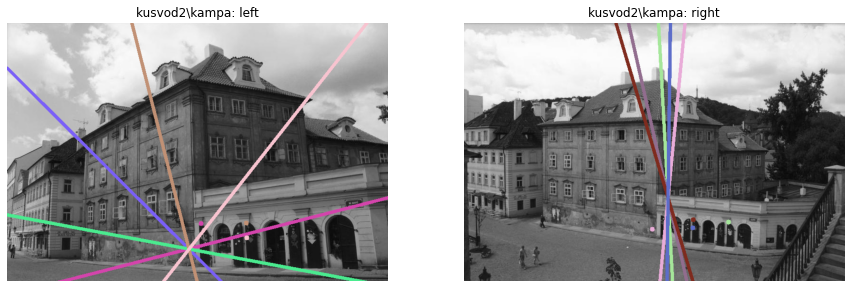

kusvod2\Kyoto


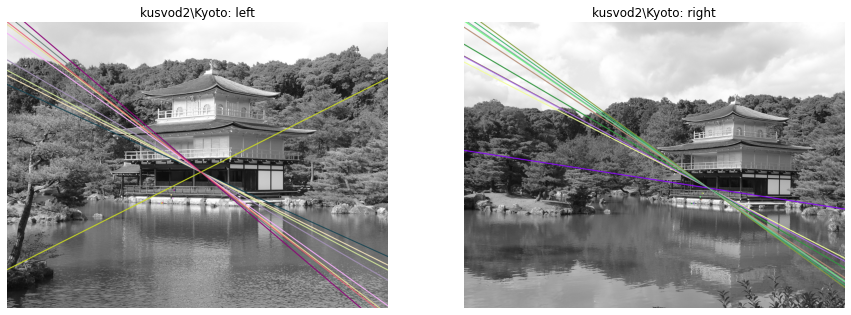

kusvod2\leafs


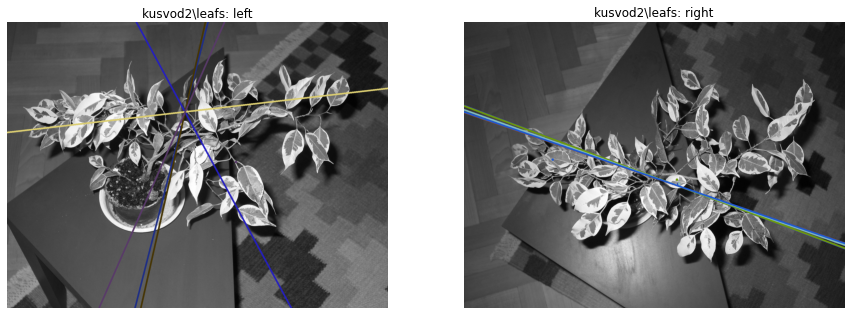

kusvod2\plant


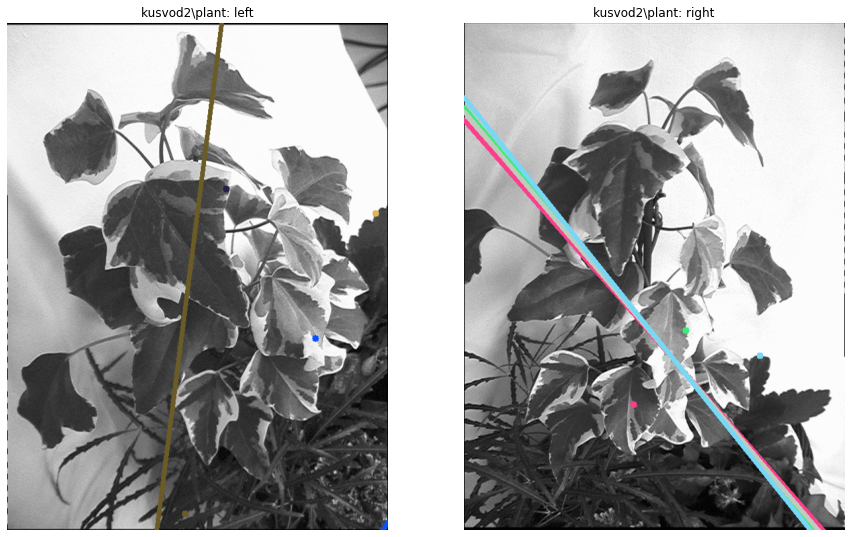

kusvod2\rotunda


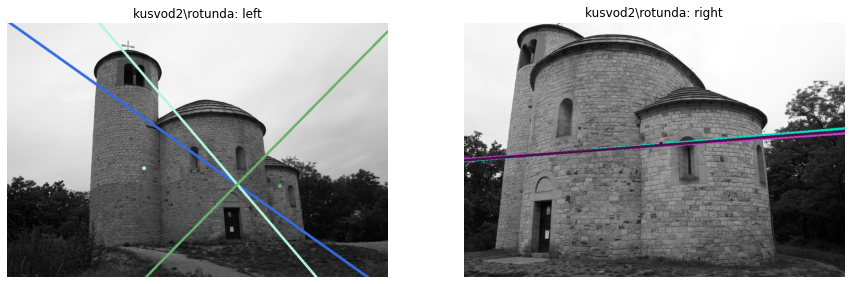

kusvod2\shout


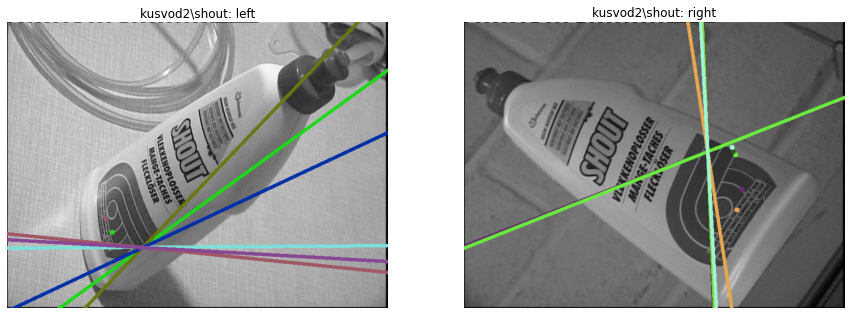

kusvod2\valbonne


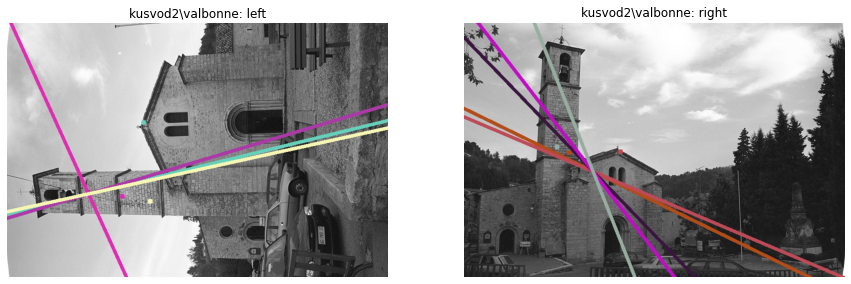

kusvod2\wall


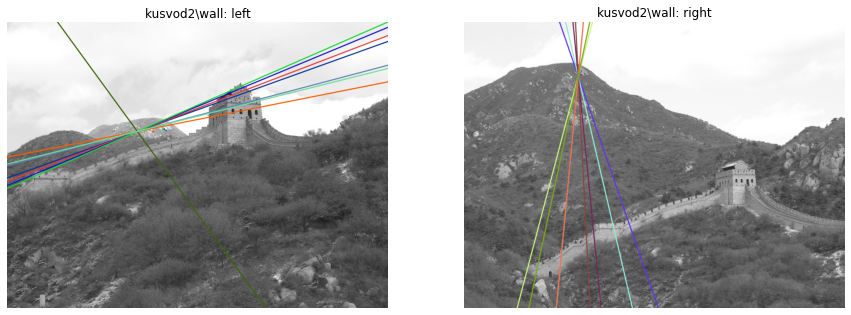

kusvod2\wash


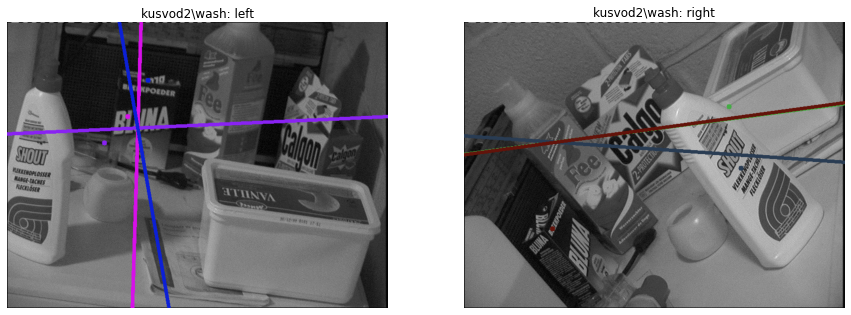

kusvod2\zoom


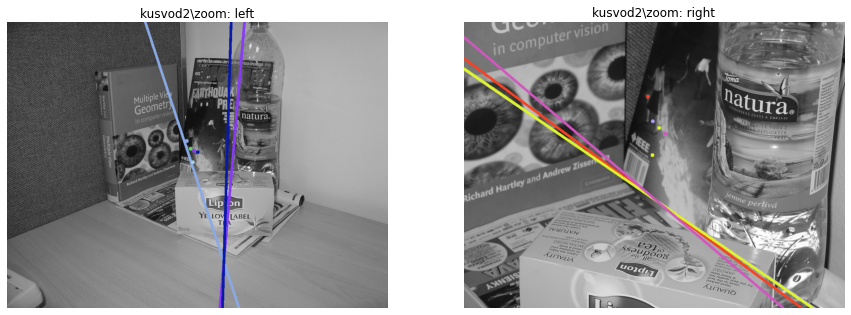

In [40]:
for i in range(n_images):
    print(imgs[i][0][:-5])
    max_A, max_B, lines_A, lines_B = results[i]
    imgA = img_AB[i][0]
    imgB = img_AB[i][1]
    displayImage(max_A, max_B, lines_A, lines_B, imgA, imgB, imgs[i][0][:-5])